<a href="https://colab.research.google.com/github/mikeonly/nma_easy_cabbage/blob/master/success_trial_pca_driver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks/NMA

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/NMA


In [ ]:
import pickle
import numpy as np

In [ ]:
with open("pos_isi.pickle", "rb") as f:
  pos_isi = pickle.load(f)

with open("pos_isi_track.pickle", "rb") as f:
  pos_isi_track = pickle.load(f)

with open("neg_isi_track.pickle", "rb") as f:
  neg_isi_track = pickle.load(f)

with open("neg_isi.pickle", "rb") as f:
  neg_isi = pickle.load(f)

In [ ]:
with open("loc_labels.pickle", "rb") as f:
  loc_labels = pickle.load(f)

In [ ]:
#Each session (key of pos_ssn dictionary) is a neuron (key of pos_ssn[s_no])

pos_ssn = {}
for i, t in enumerate(pos_isi_track):
  s_no, t_no, n_no, _ = t

  if len(pos_isi[i]) != 0:
     
    if s_no not in pos_ssn:
      pos_ssn[s_no] = {}

    if n_no not in pos_ssn[s_no]:
      pos_ssn[s_no][n_no] = []

    pos_ssn[s_no][n_no] += pos_isi[i]

In [ ]:
print(pos_ssn.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38])


In [ ]:
neg_ssn = {}
for i, t in enumerate(neg_isi_track):
  s_no, t_no, n_no, _ = t

  if len(neg_isi[i]) != 0:
     
    if s_no not in neg_ssn:
      neg_ssn[s_no] = {}

    if n_no not in neg_ssn[s_no]:
      neg_ssn[s_no][n_no] = []

    neg_ssn[s_no][n_no] += neg_isi[i]

In [ ]:
def get_max_ele(ssn_dic):
  max_e = 0
  for i in pos_ssn:
    for j in pos_ssn[i]:
      if max(pos_ssn[i][j]) > max_e:
        max_e =  max(pos_ssn[i][j])
  return max_e

In [ ]:
def get_bins(isi_neuron, bin_size, total_bins):
    spikes_per_bin, bins = np.histogram(isi_neuron, bins = np.arange(0, bin_size*(total_bins+1), bin_size))
    return spikes_per_bin

In [ ]:
from math import ceil

def bin_neurons(ssn_dict, bin_size, brain_label):
  max_ele = get_max_ele(ssn_dict)
  total_bins = ceil(max_ele/bin_size)

  feature_vector = []
  loc_feature = []

  for s_no in ssn_dict:
    for n_no in ssn_dict[s_no]:
      feature_vector.append(get_bins(ssn_dict[s_no][n_no], bin_size, total_bins))
      loc_feature.append(brain_label[s_no][n_no])

  return feature_vector, loc_feature

In [ ]:
pos_isi_binned, pos_features = bin_neurons(pos_ssn, 0.02, loc_labels)

In [ ]:
pos_isi_binned = np.array(pos_isi_binned)

In [ ]:
a ,b = np.unique(pos_isi_binned, return_counts=True)
print(a)
print(b)

[   0    1    2 ... 6443 8512 9663]
[2936385  300251  103200 ...       1       1       1]


In [ ]:
s = pos_isi_binned.shape
print(100*(b[0]/(s[0]*s[1])))

81.8989645434578


In [ ]:
s

(28683, 125)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(pos_isi_binned)

In [ ]:
var_exp = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [10, 10]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

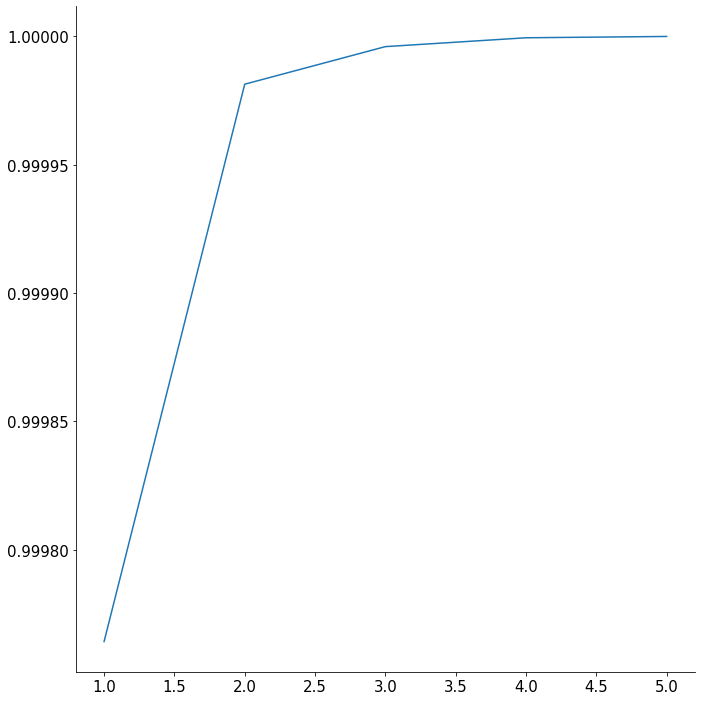

In [ ]:
plt.figure()
plt.plot(np.arange(1, 6, 1), var_exp)
plt.show()

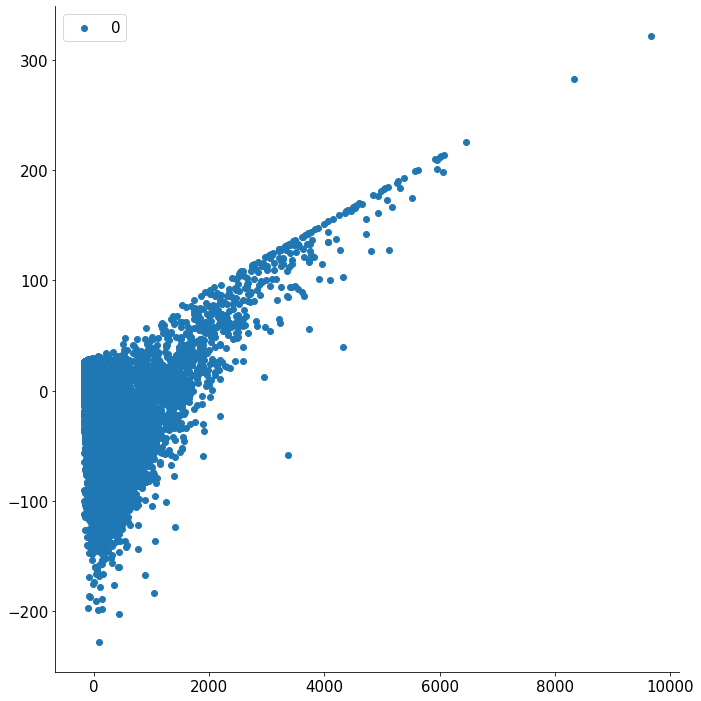

In [ ]:
plt.figure()
plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.legend(loc_labels)
plt.show()


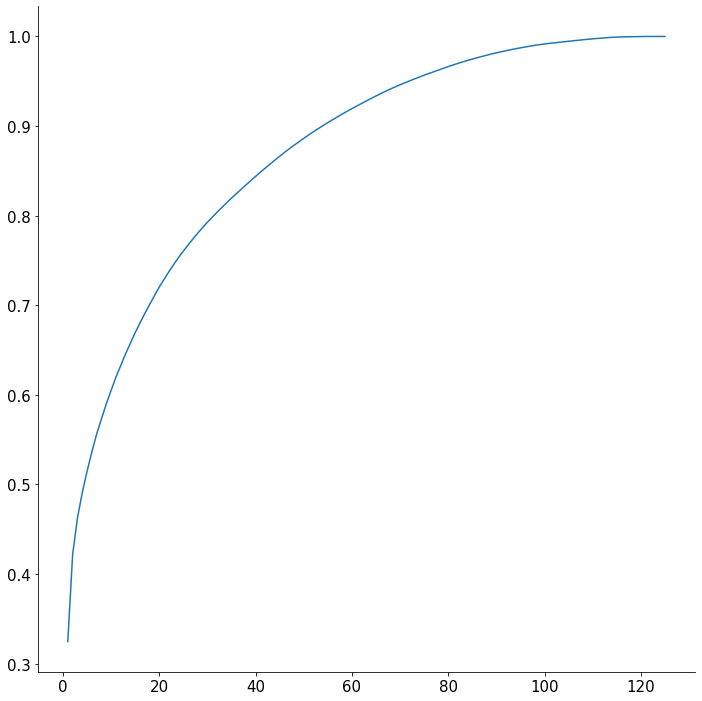

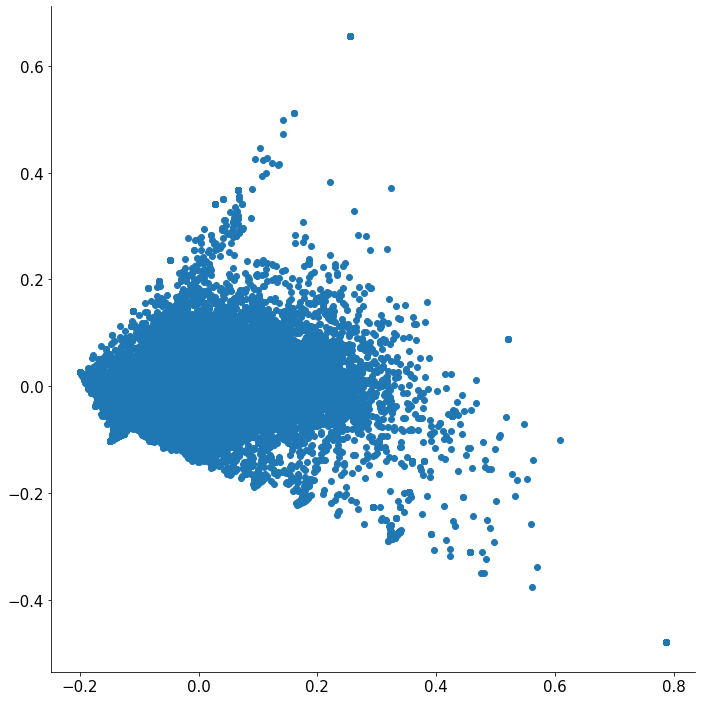

In [ ]:
from sklearn.preprocessing import normalize
pca2 = PCA(n_components=125)
principalComponents2 = pca2.fit_transform(normalize(pos_isi_binned, axis=1, norm='l1'))

var_exp = np.cumsum(pca2.explained_variance_ratio_)
plt.figure()
plt.plot(np.arange(1, 126, 1), var_exp)
plt.show()

plt.figure()
plt.scatter(principalComponents2[:,1], principalComponents2[:,2])
plt.show()

In [ ]:
pca2.explained_variance_ratio_

array([3.24736738e-01, 9.67928484e-02, 4.09581835e-02, 2.83109090e-02,
       2.39098178e-02, 2.17552801e-02, 1.99797751e-02, 1.70104392e-02,
       1.66106976e-02, 1.50785049e-02, 1.46853934e-02, 1.30788746e-02,
       1.28764980e-02, 1.19064650e-02, 1.18331186e-02, 1.08226011e-02,
       1.06393789e-02, 1.00122097e-02, 9.83725416e-03, 9.58687340e-03,
       8.65283523e-03, 8.43396819e-03, 8.06855677e-03, 7.76355237e-03,
       7.20580652e-03, 6.94075006e-03, 6.68024546e-03, 6.49735684e-03,
       6.11019755e-03, 5.96688754e-03, 5.59912593e-03, 5.53310993e-03,
       5.38691429e-03, 5.26369129e-03, 5.06648865e-03, 4.95544029e-03,
       4.92710184e-03, 4.87859451e-03, 4.79033286e-03, 4.72763722e-03,
       4.63969907e-03, 4.55167153e-03, 4.46647642e-03, 4.41279100e-03,
       4.35759251e-03, 4.26257796e-03, 4.14063934e-03, 3.91942968e-03,
       3.87324112e-03, 3.78845898e-03, 3.70837933e-03, 3.64215074e-03,
       3.48941144e-03, 3.40467147e-03, 3.32409643e-03, 3.26108173e-03,
      